
Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



Ingrese el orden del grafo: 5


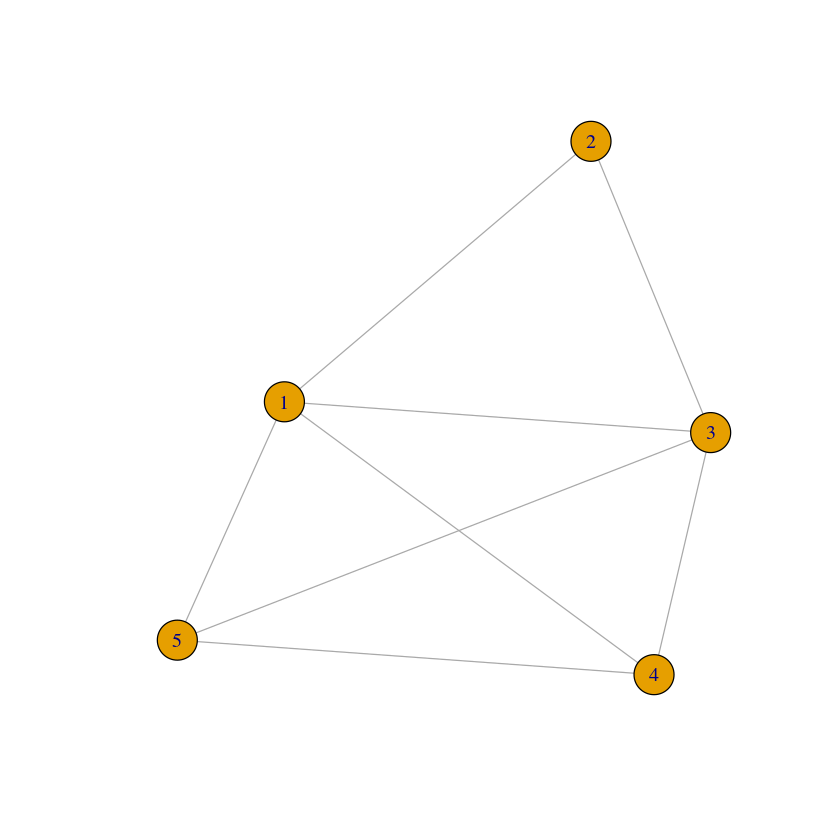

In [1]:
#Generamos grafos aleatorios, hasta obtener uno que sea hamiltoniano.

library(igraph)

## https://www.r-bloggers.com/lexicographic-permutations-euler-problem-24/

nextPerm <- function(a) {
  #Encuentra el sufijo no creciente mas largo.
  i <- length(a) 
  
  while (i > 1 && a[i - 1] >= a[i])
    i <- i - 1
  #i es el indice de cabeza del sufijo.
  #¿Estamos en la ultima permutacion?
  if (i <= 1) return(NULL)
  #a[i-1] es el pivote.
  #Encuentra el elemento mas a la derecha que excede el pivote.
  j <- length(a)
  while (a[j] <= a[i - 1]) 
    j <- j - 1
  #intercambiamos el pivote con a[j].
  aux <- a[i - 1]
  a[i - 1] <- a[j]
  a[j] <- aux
  #Invierte el sufijo.
  a[i:length(a)] <- rev(a[i:length(a)])
  return(a)
}

##
#	Resuelve si un grafo es hamiltoniano.
#	input : matriz de adjacencia en igraph.
#	output : TRUE o FALSE si es hamiltoniano 
#	o no respectivamente.
#
#	[1] http://igraph.org/r/doc/
#	[2] https://stat.ethz.ch/R-manual/R-devel/library/base/html/bitwise.html 
#	[3] https://stackoverflow.com/questions/4678333/n-n-1-what-does-this-expression-do
#

esHamiltoniano <- function(g, cycle) {		
  
  n <- vcount(g)
  
  p <- 1:n
  
  cont = 1
  for (i in 1:n)
    cont <- cont * i
  
  hamiltoniano <- T
  while(cont > 0) {
    cont <- cont - 1
    # hamiltoniano <- T
    for (i in 1:(n-1)) {
      if (!are_adjacent(g, p[i], p[i+1])) {
        hamiltoniano <- F
      }
    }
    
    if (!are_adjacent(g, p[n], p[1])) {
      hamiltoniano <- F
    }
    
    if (hamiltoniano == T) break
    p <- nextPerm(p) 
  }
  
  if (hamiltoniano == F) return (F)
  eval.parent(substitute(cycle <- c(p, p[1])))
  return(T)
}

##
#	construimos un grafo random con n nodos.
#	Usamos la libreria "igraph".
#	[1] https://www.r-graph-gallery.com/248-igraph-plotting-parameters/

buildGraph <- function(n) {
  adjm <- matrix(sample(0:1, n*n, replace=T, prob=c(0.45, 0.55)), nr=n) ## [1] ## 
  
  # hacemos simetrica (no dirigida) la matriz random.
  adjm <- (adjm + t(adjm))/2
  return(graph.adjacency(adjm, mode="undirected", diag=F))
}

n <- as.integer(readline(prompt = "Ingrese el orden del grafo: "))
while (TRUE) {
  # construimos el grafo hasta que sea hamiltoniano.
  g <- buildGraph(n)
  cycle <- c()	
  
  if (esHamiltoniano(g, cycle)) {
    # visualiza los nodos tan grandes como su grado. 
    # http://www.shizukalab.com/toolkits/sna/plotting-networks-pt-2
    #V(g)$size=degree(g)*5
    
    #dado el ciclo formamos las aristas.
    edgeCycle <- c()
    for (i in 1:(length(cycle)-1)) {	
      edgeCycle <- c(edgeCycle, c(cycle[i], cycle[i+1]))
    }
    
    plot(g)
    break
  }
}

In [ ]:
###Se puede observar un grafo Hamiltoniano pero no el ciclo resaltado que queriamos mostrar.